In [35]:
#import the dataset with adding header names to the dataset and checking for null values stored as ?
import pandas as pd
#Train the gaussian naives basien model using the train data
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import NearestCentroid
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import seaborn as sns
from sklearn.linear_model import SGDClassifier
bc = pd.read_csv("bcw.data",na_values="?",names=["Sample code number","Clump Thickness","Uniformity of Cell Size","Uniformity of Cell Shape","Marginal Adhesion","Single Epithelial Cell Size","Bare Nuclei","Bland Chromatin","Normal Nucleoli","Mitoses","class"])
bc.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


In [36]:
#check the number of null values in the dataset
print(bc.isna().sum())


Sample code number              0
Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
class                           0
dtype: int64


In [37]:
#Dividing the 2 classes into 2 dataframes to fill in missing values
grouped = bc.groupby(bc['class'])
bcb = grouped.get_group(2)
bcb2=bcb
bcb.head()
bcm=grouped.get_group(4)
bcm2=bcm
bcm.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,class
5,1017122,8,10,10,8,7,10.0,9,7,1,4
12,1041801,5,3,3,3,2,3.0,4,4,1,4
14,1044572,8,7,5,10,7,9.0,5,5,4,4
15,1047630,7,4,6,4,6,1.0,4,3,1,4
18,1050670,10,7,7,6,4,10.0,4,1,2,4


In [38]:
#Filling in missed values using respective means 
Bare_Nuclei_meanb=bcb["Bare Nuclei"].mean()
print(Bare_Nuclei_meanb)
bcb['Bare Nuclei']=bcb['Bare Nuclei'].fillna(Bare_Nuclei_meanb)
Bare_Nuclei_meanm=bcm["Bare Nuclei"].mean()
print(Bare_Nuclei_meanm)
bcm['Bare Nuclei']=bcm['Bare Nuclei'].fillna(Bare_Nuclei_meanm)
frames = [bcb,bcm]
bc3 = pd.concat(frames)

#Filling in missed values using respective modes 
Bare_Nuclei_modeb=bcb["Bare Nuclei"].mode()
print(Bare_Nuclei_modeb)
bcb2['Bare Nuclei']=bcb2['Bare Nuclei'].fillna(Bare_Nuclei_modeb)
Bare_Nuclei_modem=bcm["Bare Nuclei"].mode()
print(Bare_Nuclei_modem)
bcm2['Bare Nuclei']=bcm2['Bare Nuclei'].fillna(Bare_Nuclei_modem)
frames2 = [bcb2,bcm2]
bc4 = pd.concat(frames2)

1.3468468468468469
7.627615062761507
0    1.0
dtype: float64
0    10.0
dtype: float64


C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.o

In [39]:
# Dropping missed values
bc2=bc.dropna()
bc=bc4

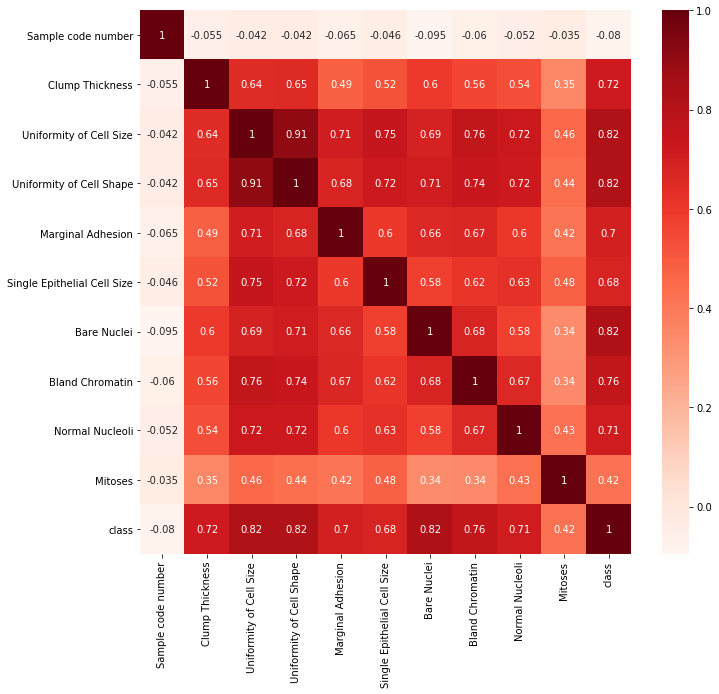

In [40]:
#Using Pearson Correlation
plt.figure(figsize=(11,10))
cor = bc.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.savefig('correlation.png')
plt.show()


In [41]:
#Correlation with output variable
cor_target = abs(cor["class"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

Clump Thickness                0.716001
Uniformity of Cell Size        0.817904
Uniformity of Cell Shape       0.818934
Marginal Adhesion              0.696800
Single Epithelial Cell Size    0.682785
Bare Nuclei                    0.824843
Bland Chromatin                0.756616
Normal Nucleoli                0.712244
class                          1.000000
Name: class, dtype: float64

In [42]:
#divide the data into input values and target values
bc_x=bc.iloc[:,1:9]
bc_y=bc.iloc[:,10:11]
bc_y=pd.Series.ravel(bc_y)

bc2_x=bc2.iloc[:,1:9]
bc2_y=bc2.iloc[:,10:11]
bc2_y=pd.Series.ravel(bc2_y)

bc3_x=bc3.iloc[:,1:9]
bc3_y=bc3.iloc[:,10:11]
bc3_y=pd.Series.ravel(bc3_y)
bc2_x.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli
0,5,1,1,1,2,1.0,3,1
1,5,4,4,5,7,10.0,3,2
2,3,1,1,1,2,2.0,3,1
3,6,8,8,1,3,4.0,3,7
4,4,1,1,3,2,1.0,3,1


In [43]:
print("________________Test for KNN_______________")
neigh = KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(neigh, bc2_x, bc2_y, cv=10)
print("KNN-3 Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))
neigh = KNeighborsClassifier(n_neighbors=4)
scores = cross_val_score(neigh, bc2_x, bc2_y, cv=10)
print("KNN-4 Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))
neigh = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(neigh, bc2_x, bc2_y, cv=10)
print("KNN-5 Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))
neigh = KNeighborsClassifier(n_neighbors=6)
scores = cross_val_score(neigh, bc2_x, bc2_y, cv=10)
print("KNN-6 Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))
neigh = KNeighborsClassifier(n_neighbors=7)
scores = cross_val_score(neigh, bc2_x, bc2_y, cv=10)
print("KNN-7 Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))
neigh = KNeighborsClassifier(n_neighbors=8)
scores = cross_val_score(neigh, bc2_x, bc2_y, cv=10)
print("KNN-8 Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))


________________Test for KNN_______________
KNN-3 Accuracy: 0.9708 (+/- 0.0194)
KNN-4 Accuracy: 0.9650 (+/- 0.0217)
KNN-5 Accuracy: 0.9708 (+/- 0.0194)
KNN-6 Accuracy: 0.9651 (+/- 0.0305)
KNN-7 Accuracy: 0.9709 (+/- 0.0233)
KNN-8 Accuracy: 0.9651 (+/- 0.0298)


In [44]:
print("_________3 fold validation______________")
gnb = GaussianNB()
scores = cross_val_score(gnb, bc_x, bc_y, cv=3)
scores2 = cross_val_score(gnb, bc2_x, bc2_y, cv=3)
scores3 = cross_val_score(gnb, bc3_x, bc3_y, cv=3)
print("Naive Bayes Accuracy after removing null values: %0.4f (+/- %0.4f)" % (scores2.mean(), scores2.std()))
print("Naive Bayes Accuracy after filling null values with class mean: %0.4f (+/- %0.4f)" % (scores3.mean(), scores3.std()))
print("Naive Bayes Accuracy after filling null values with mode: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))

neigh = KNeighborsClassifier(n_neighbors=7)
scores = cross_val_score(neigh, bc_x, bc_y, cv=3)
scores2 = cross_val_score(neigh, bc2_x, bc2_y, cv=3)
scores3 = cross_val_score(neigh, bc3_x, bc3_y, cv=3)
print("KNN Accuracy after removing null values: %0.4f (+/- %0.4f)" % (scores2.mean(), scores2.std()))
print("KNN Accuracy after filling null values with class mean: %0.4f (+/- %0.4f)" % (scores3.mean(), scores3.std()))
print("KNN Accuracy after filling null values with mode: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))

clf = svm.SVC(gamma='auto')
scores = cross_val_score(clf, bc_x, bc_y, cv=3)
scores2 = cross_val_score(clf, bc2_x, bc2_y, cv=3)
scores3 = cross_val_score(clf, bc3_x, bc3_y, cv=3)
print("SVM Accuracy after removing null values: %0.4f (+/- %0.4f)" % (scores2.mean(), scores2.std()))
print("SVM Accuracy after filling null values with class mean: %0.4f (+/- %0.4f)" % (scores3.mean(), scores3.std()))
print("SVM Accuracy after filling null values with mode: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))

clf = NearestCentroid()
scores = cross_val_score(clf, bc_x, bc_y, cv=3)
scores2 = cross_val_score(clf, bc2_x, bc2_y, cv=3)
scores3 = cross_val_score(clf, bc3_x, bc3_y, cv=3)
print("Distance to mean Accuracy after removing null values: %0.4f (+/- %0.4f)" % (scores2.mean(), scores2.std()))
print("Distance to mean Accuracy after filling null values with class mean: %0.4f (+/- %0.4f)" % (scores3.mean(), scores3.std()))
print("Distance to mean Accuracy after filling null values with mode: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))

clf = LinearDiscriminantAnalysis()
scores = cross_val_score(clf, bc_x, bc_y, cv=3)
scores2 = cross_val_score(clf, bc2_x, bc2_y, cv=3)
scores3 = cross_val_score(clf, bc3_x, bc3_y, cv=3)
print("LDA Accuracy after removing null values: %0.4f (+/- %0.4f)" % (scores2.mean(), scores2.std()))
print("LDA Accuracy after filling null values with class mean: %0.4f (+/- %0.4f)" % (scores3.mean(), scores3.std()))
print("LDA Accuracy after filling null values with mode: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))

clf= SGDClassifier(loss='log')
scores = cross_val_score(clf, bc_x, bc_y, cv=3)
scores2 = cross_val_score(clf, bc2_x, bc2_y, cv=3)
scores3 = cross_val_score(clf, bc3_x, bc3_y, cv=3)
print("SDC Accuracy after removing null values: %0.4f (+/- %0.4f)" % (scores2.mean(), scores2.std()))
print("SDC Accuracy after filling null values with class mean: %0.4f (+/- %0.4f)" % (scores3.mean(), scores3.std()))
print("SDC Accuracy after filling null values with mode: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))

_________3 fold validation______________
Naive Bayes Accuracy after removing null values: 0.9620 (+/- 0.0149)
Naive Bayes Accuracy after filling null values with class mean: 0.9657 (+/- 0.0152)
Naive Bayes Accuracy after filling null values with mode: 0.9657 (+/- 0.0152)
KNN Accuracy after removing null values: 0.9634 (+/- 0.0269)
KNN Accuracy after filling null values with class mean: 0.9615 (+/- 0.0244)
KNN Accuracy after filling null values with mode: 0.9615 (+/- 0.0244)
SVM Accuracy after removing null values: 0.9561 (+/- 0.0235)
SVM Accuracy after filling null values with class mean: 0.9557 (+/- 0.0261)
SVM Accuracy after filling null values with mode: 0.9557 (+/- 0.0261)
Distance to mean Accuracy after removing null values: 0.9605 (+/- 0.0270)
Distance to mean Accuracy after filling null values with class mean: 0.9586 (+/- 0.0280)
Distance to mean Accuracy after filling null values with mode: 0.9586 (+/- 0.0280)
LDA Accuracy after removing null values: 0.9590 (+/- 0.0278)
LDA Acc

In [45]:
print("_________5 fold validation______________")
gnb = GaussianNB()
scores = cross_val_score(gnb, bc_x, bc_y, cv=5)
scores2 = cross_val_score(gnb, bc2_x, bc2_y, cv=5)
scores3 = cross_val_score(gnb, bc3_x, bc3_y, cv=5)
print("Naive Bayes Accuracy after removing null values: %0.4f (+/- %0.4f)" % (scores2.mean(), scores2.std()))
print("Naive Bayes Accuracy after filling null values with class mean: %0.4f (+/- %0.4f)" % (scores3.mean(), scores3.std()))
print("Naive Bayes Accuracy after filling null values with overall mode: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))

neigh = KNeighborsClassifier(n_neighbors=7)
scores = cross_val_score(neigh, bc_x, bc_y, cv=5)
scores2 = cross_val_score(neigh, bc2_x, bc2_y, cv=5)
scores3 = cross_val_score(neigh, bc3_x, bc3_y, cv=5)
print("KNN Accuracy after removing null values: %0.4f (+/- %0.4f)" % (scores2.mean(), scores2.std()))
print("KNN Accuracy after filling null values with class mean: %0.4f (+/- %0.4f)" % (scores3.mean(), scores3.std()))
print("KNN Accuracy after filling null values with mode: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))

clf = svm.SVC(gamma='auto')
scores = cross_val_score(clf, bc_x, bc_y, cv=5)
scores2 = cross_val_score(clf, bc2_x, bc2_y, cv=5)
scores3 = cross_val_score(clf, bc3_x, bc3_y, cv=5)
print("SVM Accuracy after removing null values: %0.4f (+/- %0.4f)" % (scores2.mean(), scores2.std()))
print("SVM Accuracy after filling null values with class mean: %0.4f (+/- %0.4f)" % (scores3.mean(), scores3.std()))
print("SVM Accuracy after filling null values with mode: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))

clf = NearestCentroid()
scores = cross_val_score(clf, bc_x, bc_y, cv=5)
scores2 = cross_val_score(clf, bc2_x, bc2_y, cv=5)
scores3 = cross_val_score(clf, bc3_x, bc3_y, cv=5)
print("Distance to mean Accuracy after removing null values: %0.4f (+/- %0.4f)" % (scores2.mean(), scores2.std()))
print("Distance to mean Accuracy after filling null values with class mean: %0.4f (+/- %0.4f)" % (scores3.mean(), scores3.std()))
print("Distance to mean Accuracy after filling null values with mode: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))

clf = LinearDiscriminantAnalysis()
scores = cross_val_score(clf, bc_x, bc_y, cv=5)
scores2 = cross_val_score(clf, bc2_x, bc2_y, cv=5)
scores3 = cross_val_score(clf, bc3_x, bc3_y, cv=5)
print("LDA Accuracy after removing null values: %0.4f (+/- %0.4f)" % (scores2.mean(), scores2.std()))
print("LDA Accuracy after filling null values with class mean: %0.4f (+/- %0.4f)" % (scores3.mean(), scores3.std()))
print("LDA Accuracy after filling null values with mode: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))

clf= SGDClassifier(loss='log')
scores = cross_val_score(clf, bc_x, bc_y, cv=5)
scores2 = cross_val_score(clf, bc2_x, bc2_y, cv=5)
scores3 = cross_val_score(clf, bc3_x, bc3_y, cv=5)
print("SDC Accuracy after removing null values: %0.4f (+/- %0.4f)" % (scores2.mean(), scores2.std()))
print("SDC Accuracy after filling null values with class mean: %0.4f (+/- %0.4f)" % (scores3.mean(), scores3.std()))
print("SDC Accuracy after filling null values with mode: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))

_________5 fold validation______________
Naive Bayes Accuracy after removing null values: 0.9635 (+/- 0.0145)
Naive Bayes Accuracy after filling null values with class mean: 0.9643 (+/- 0.0185)
Naive Bayes Accuracy after filling null values with overall mode: 0.9643 (+/- 0.0185)
KNN Accuracy after removing null values: 0.9664 (+/- 0.0247)
KNN Accuracy after filling null values with class mean: 0.9644 (+/- 0.0304)
KNN Accuracy after filling null values with mode: 0.9644 (+/- 0.0304)
SVM Accuracy after removing null values: 0.9503 (+/- 0.0297)
SVM Accuracy after filling null values with class mean: 0.9486 (+/- 0.0316)
SVM Accuracy after filling null values with mode: 0.9486 (+/- 0.0316)
Distance to mean Accuracy after removing null values: 0.9606 (+/- 0.0335)
Distance to mean Accuracy after filling null values with class mean: 0.9587 (+/- 0.0354)
Distance to mean Accuracy after filling null values with mode: 0.9587 (+/- 0.0354)
LDA Accuracy after removing null values: 0.9576 (+/- 0.0352)

In [46]:
print("_________10 fold validation______________")
gnb = GaussianNB()
scores = cross_val_score(gnb, bc_x, bc_y, cv=10)
scores2 = cross_val_score(gnb, bc2_x, bc2_y, cv=10)
scores3 = cross_val_score(gnb, bc3_x, bc3_y, cv=10)
print("Naive Bayes Accuracy after removing null values: %0.4f (+/- %0.4f)" % (scores2.mean(), scores2.std()))
print("Naive Bayes Accuracy after filling null values with class mean: %0.4f (+/- %0.4f)" % (scores3.mean(), scores3.std()))
print("Naive Bayes Accuracy after filling null values with overall mode: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))

neigh = KNeighborsClassifier(n_neighbors=7)
scores = cross_val_score(neigh, bc_x, bc_y, cv=10)
scores2 = cross_val_score(neigh, bc2_x, bc2_y, cv=10)
scores3 = cross_val_score(neigh, bc3_x, bc3_y, cv=10)
print("KNN Accuracy after removing null values: %0.4f (+/- %0.4f)" % (scores2.mean(), scores2.std()))
print("KNN Accuracy after filling null values with class mean: %0.4f (+/- %0.4f)" % (scores3.mean(), scores3.std()))
print("KNN Accuracy after filling null values with mode: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))

clf = svm.SVC(gamma='auto')
scores = cross_val_score(clf, bc_x, bc_y, cv=10)
scores2 = cross_val_score(clf, bc2_x, bc2_y, cv=10)
scores3 = cross_val_score(clf, bc3_x, bc3_y, cv=10)
print("SVM Accuracy after removing null values: %0.4f (+/- %0.4f)" % (scores2.mean(), scores2.std()))
print("SVM Accuracy after filling null values with class mean: %0.4f (+/- %0.4f)" % (scores3.mean(), scores3.std()))
print("SVM Accuracy after filling null values with mode: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))

clf = NearestCentroid()
scores = cross_val_score(clf, bc_x, bc_y, cv=10)
scores2 = cross_val_score(clf, bc2_x, bc2_y, cv=10)
scores3 = cross_val_score(clf, bc3_x, bc3_y, cv=10)
print("Distance to mean Accuracy after removing null values: %0.4f (+/- %0.4f)" % (scores2.mean(), scores2.std()))
print("Distance to mean Accuracy after filling null values with class mean: %0.4f (+/- %0.4f)" % (scores3.mean(), scores3.std()))
print("Distance to mean Accuracy after filling null values with mode: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))

clf = LinearDiscriminantAnalysis()
scores = cross_val_score(clf, bc_x, bc_y, cv=10)
scores2 = cross_val_score(clf, bc2_x, bc2_y, cv=10)
scores3 = cross_val_score(clf, bc3_x, bc3_y, cv=10)
print("LDA Accuracy after removing null values: %0.4f (+/- %0.4f)" % (scores2.mean(), scores2.std()))
print("LDA Accuracy after filling null values with class mean: %0.4f (+/- %0.4f)" % (scores3.mean(), scores3.std()))
print("LDA Accuracy after filling null values with mode: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))

clf= SGDClassifier(loss='log')
scores = cross_val_score(clf, bc_x, bc_y, cv=10)
scores2 = cross_val_score(clf, bc2_x, bc2_y, cv=10)
scores3 = cross_val_score(clf, bc3_x, bc3_y, cv=10)
print("SDC Accuracy after removing null values: %0.4f (+/- %0.4f)" % (scores2.mean(), scores2.std()))
print("SDC Accuracy after filling null values with class mean: %0.4f (+/- %0.4f)" % (scores3.mean(), scores3.std()))
print("SDC Accuracy after filling null values with mode: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))

_________10 fold validation______________
Naive Bayes Accuracy after removing null values: 0.9650 (+/- 0.0173)
Naive Bayes Accuracy after filling null values with class mean: 0.9643 (+/- 0.0239)
Naive Bayes Accuracy after filling null values with overall mode: 0.9643 (+/- 0.0239)
KNN Accuracy after removing null values: 0.9709 (+/- 0.0233)
KNN Accuracy after filling null values with class mean: 0.9687 (+/- 0.0303)
KNN Accuracy after filling null values with mode: 0.9687 (+/- 0.0303)
SVM Accuracy after removing null values: 0.9563 (+/- 0.0281)
SVM Accuracy after filling null values with class mean: 0.9573 (+/- 0.0334)
SVM Accuracy after filling null values with mode: 0.9573 (+/- 0.0334)
Distance to mean Accuracy after removing null values: 0.9636 (+/- 0.0298)
Distance to mean Accuracy after filling null values with class mean: 0.9615 (+/- 0.0348)
Distance to mean Accuracy after filling null values with mode: 0.9615 (+/- 0.0348)
LDA Accuracy after removing null values: 0.9607 (+/- 0.0349

In [47]:
print("__________80-20Test train split data_________")
X_train, X_test, y_train, y_test = train_test_split(bc_x, bc_y, test_size=0.2)
X_train2, X_test2, y_train2, y_test2 = train_test_split(bc2_x, bc2_y, test_size=0.2)
X_train3, X_test3, y_train3, y_test3 = train_test_split(bc3_x, bc3_y, test_size=0.2)
gnb = GaussianNB()
model=gnb.fit(X_train,y_train) 
model2=gnb.fit(X_train2,y_train2)
model3=gnb.fit(X_train3,y_train3)
#Test the trained model on unseen data 
predicted = model.predict(X_test)
predicted2 = model2.predict(X_test2)
predicted3 = model3.predict(X_test3)
print("Naive-Bayes accuracy after removing null values : ",accuracy_score(y_test2, predicted2, normalize = True))
print("Naive-Bayes accuracy after filling null values with class mean : ",accuracy_score(y_test3, predicted3, normalize = True))
print("Naive-Bayes accuracy after filling null values with mode : ",accuracy_score(y_test, predicted, normalize = True))

gnb = KNeighborsClassifier(n_neighbors=7)
model=gnb.fit(X_train,y_train) 
model2=gnb.fit(X_train2,y_train2)
model3=gnb.fit(X_train3,y_train3)
#Test the trained model on unseen data 
predicted = model.predict(X_test)
predicted2 = model2.predict(X_test2)
predicted3 = model3.predict(X_test3)
print("KNN-7 accuracy after removing null values : ",accuracy_score(y_test2, predicted2, normalize = True))
print("KNN-7 accuracy after filling null values with class mean : ",accuracy_score(y_test3, predicted3, normalize = True))
print("KNN-7 accuracy after filling null values with mode : ",accuracy_score(y_test, predicted, normalize = True))

gnb = svm.SVC(gamma='auto')
model=gnb.fit(X_train,y_train) 
model2=gnb.fit(X_train2,y_train2)
model3=gnb.fit(X_train3,y_train3)
#Test the trained model on unseen data 
predicted = model.predict(X_test)
predicted2 = model2.predict(X_test2)
predicted3 = model3.predict(X_test3)
print("SVM accuracy after removing null values : ",accuracy_score(y_test2, predicted2, normalize = True))
print("SVM accuracy after filling null values with class mean : ",accuracy_score(y_test3, predicted3, normalize = True))
print("SVM accuracy after filling null values with mode : ",accuracy_score(y_test, predicted, normalize = True))

gnb = NearestCentroid()
model=gnb.fit(X_train,y_train) 
model2=gnb.fit(X_train2,y_train2)
model3=gnb.fit(X_train3,y_train3)
#Test the trained model on unseen data 
predicted = model.predict(X_test)
predicted2 = model2.predict(X_test2)
predicted3 = model3.predict(X_test3)
print("distance to mean accuracy after removing null values : ",accuracy_score(y_test2, predicted2, normalize = True))
print("distance to mean accuracy after filling null values with class mean : ",accuracy_score(y_test3, predicted3, normalize = True))
print("distance to mean accuracy after filling null values with mode : ",accuracy_score(y_test, predicted, normalize = True))

gnb = LinearDiscriminantAnalysis()
model=gnb.fit(X_train,y_train) 
model2=gnb.fit(X_train2,y_train2)
model3=gnb.fit(X_train3,y_train3)
#Test the trained model on unseen data 
predicted = model.predict(X_test)
predicted2 = model2.predict(X_test2)
predicted3 = model3.predict(X_test3)
print("LDA accuracy after removing null values : ",accuracy_score(y_test2, predicted2, normalize = True))
print("LDA accuracy after filling null values with class mean : ",accuracy_score(y_test3, predicted3, normalize = True))
print("LDA accuracy after filling null values with mode : ",accuracy_score(y_test, predicted, normalize = True))

clf= SGDClassifier(loss='log')
model=clf.fit(X_train,y_train) 
model2=clf.fit(X_train2,y_train2)
model3=gnb.fit(X_train3,y_train3)
#Test the trained model on unseen data 
predicted = model.predict(X_test)
predicted2 = model2.predict(X_test2)
predicted3 = model3.predict(X_test3)
print("SDC accuracy after removing null values : ",accuracy_score(y_test2, predicted2, normalize = True))
print("SDC accuracy after filling null values with class mean : ",accuracy_score(y_test3, predicted3, normalize = True))
print("SDC accuracy after filling null values with mode : ",accuracy_score(y_test, predicted, normalize = True))

__________80-20Test train split data_________
Naive-Bayes accuracy after removing null values :  0.9781021897810219
Naive-Bayes accuracy after filling null values with class mean :  0.95
Naive-Bayes accuracy after filling null values with mode :  0.9714285714285714
KNN-7 accuracy after removing null values :  0.9854014598540146
KNN-7 accuracy after filling null values with class mean :  0.9714285714285714
KNN-7 accuracy after filling null values with mode :  0.9785714285714285
SVM accuracy after removing null values :  0.9927007299270073
SVM accuracy after filling null values with class mean :  0.95
SVM accuracy after filling null values with mode :  0.9928571428571429
distance to mean accuracy after removing null values :  0.9781021897810219
distance to mean accuracy after filling null values with class mean :  0.9642857142857143
distance to mean accuracy after filling null values with mode :  0.9785714285714285
LDA accuracy after removing null values :  0.9708029197080292
LDA accurac

In [48]:
print("__________60-40Test train split data_________")
X_train, X_test, y_train, y_test = train_test_split(bc_x, bc_y, test_size=0.4)
X_train2, X_test2, y_train2, y_test2 = train_test_split(bc2_x, bc2_y, test_size=0.4)
X_train3, X_test3, y_train3, y_test3 = train_test_split(bc3_x, bc3_y, test_size=0.4)
gnb = GaussianNB()
model=gnb.fit(X_train,y_train) 
model2=gnb.fit(X_train2,y_train2)
model3=gnb.fit(X_train3,y_train3)
#Test the trained model on unseen data 
predicted = model.predict(X_test)
predicted2 = model2.predict(X_test2)
predicted3 = model3.predict(X_test3)
print("Naive-Bayes accuracy after removing null values : ",accuracy_score(y_test2, predicted2, normalize = True))
print("Naive-Bayes accuracy after filling null values with class mean : ",accuracy_score(y_test3, predicted3, normalize = True))
print("Naive-Bayes accuracy after filling null values with mode : ",accuracy_score(y_test, predicted, normalize = True))

gnb = KNeighborsClassifier(n_neighbors=7)
model=gnb.fit(X_train,y_train) 
model2=gnb.fit(X_train2,y_train2)
model3=gnb.fit(X_train3,y_train3)
#Test the trained model on unseen data 
predicted = model.predict(X_test)
predicted2 = model2.predict(X_test2)
predicted3 = model3.predict(X_test3)
print("KNN-7 accuracy after removing null values : ",accuracy_score(y_test2, predicted2, normalize = True))
print("KNN-7 accuracy after filling null values with class mean : ",accuracy_score(y_test3, predicted3, normalize = True))
print("KNN-7 accuracy after filling null values with mode : ",accuracy_score(y_test, predicted, normalize = True))

gnb = svm.SVC(gamma='auto')
model=gnb.fit(X_train,y_train) 
model2=gnb.fit(X_train2,y_train2)
model3=gnb.fit(X_train3,y_train3)
#Test the trained model on unseen data 
predicted = model.predict(X_test)
predicted2 = model2.predict(X_test2)
predicted3 = model3.predict(X_test3)
print("SVM accuracy after removing null values : ",accuracy_score(y_test2, predicted2, normalize = True))
print("SVM accuracy after filling null values with class mean : ",accuracy_score(y_test3, predicted3, normalize = True))
print("SVM accuracy after filling null values with mode : ",accuracy_score(y_test, predicted, normalize = True))

gnb = NearestCentroid()
model=gnb.fit(X_train,y_train) 
model2=gnb.fit(X_train2,y_train2)
model3=gnb.fit(X_train3,y_train3)
#Test the trained model on unseen data 
predicted = model.predict(X_test)
predicted2 = model2.predict(X_test2)
predicted3 = model3.predict(X_test3)
print("distance to mean accuracy after removing null values : ",accuracy_score(y_test2, predicted2, normalize = True))
print("distance to mean accuracy after filling null values with class mean : ",accuracy_score(y_test3, predicted3, normalize = True))
print("distance to mean accuracy after filling null values with mode : ",accuracy_score(y_test, predicted, normalize = True))

gnb = LinearDiscriminantAnalysis()
model=gnb.fit(X_train,y_train) 
model2=gnb.fit(X_train2,y_train2)
model3=gnb.fit(X_train3,y_train3)
#Test the trained model on unseen data 
predicted = model.predict(X_test)
predicted2 = model2.predict(X_test2)
predicted3 = model3.predict(X_test3)
print("LDA accuracy after removing null values : ",accuracy_score(y_test2, predicted2, normalize = True))
print("LDA accuracy after filling null values with class mean : ",accuracy_score(y_test3, predicted3, normalize = True))
print("LDA accuracy after filling null values with mode : ",accuracy_score(y_test, predicted, normalize = True))

clf= SGDClassifier(loss='log')
model=clf.fit(X_train,y_train) 
model2=clf.fit(X_train2,y_train2)
model3=gnb.fit(X_train3,y_train3)
#Test the trained model on unseen data 
predicted = model.predict(X_test)
predicted2 = model2.predict(X_test2)
predicted3 = model3.predict(X_test3)
print("SDC accuracy after removing null values : ",accuracy_score(y_test2, predicted2, normalize = True))
print("SDC accuracy after filling null values with class mean : ",accuracy_score(y_test3, predicted3, normalize = True))
print("SDC accuracy after filling null values with mode : ",accuracy_score(y_test, predicted, normalize = True))

__________60-40Test train split data_________
Naive-Bayes accuracy after removing null values :  0.9708029197080292
Naive-Bayes accuracy after filling null values with class mean :  0.9678571428571429
Naive-Bayes accuracy after filling null values with mode :  0.9678571428571429
KNN-7 accuracy after removing null values :  0.9744525547445255
KNN-7 accuracy after filling null values with class mean :  0.9714285714285714
KNN-7 accuracy after filling null values with mode :  0.9785714285714285
SVM accuracy after removing null values :  0.9817518248175182
SVM accuracy after filling null values with class mean :  0.9678571428571429
SVM accuracy after filling null values with mode :  0.9821428571428571
distance to mean accuracy after removing null values :  0.9708029197080292
distance to mean accuracy after filling null values with class mean :  0.9642857142857143
distance to mean accuracy after filling null values with mode :  0.9714285714285714
LDA accuracy after removing null values :  0.

In [50]:
bc_x=bc_x.drop(['Single Epithelial Cell Size'],axis = 1)
bc2_x=bc2_x.drop(['Single Epithelial Cell Size'],axis = 1)
bc3_x=bc3_x.drop(['Single Epithelial Cell Size'],axis = 1)

In [51]:
print("_________3 fold validation______________")
gnb = GaussianNB()
scores = cross_val_score(gnb, bc_x, bc_y, cv=3)
scores2 = cross_val_score(gnb, bc2_x, bc2_y, cv=3)
scores3 = cross_val_score(gnb, bc3_x, bc3_y, cv=3)
print("Naive Bayes Accuracy after removing null values: %0.4f (+/- %0.4f)" % (scores2.mean(), scores2.std()))
print("Naive Bayes Accuracy after filling null values with class mean: %0.4f (+/- %0.4f)" % (scores3.mean(), scores3.std()))
print("Naive Bayes Accuracy after filling null values with mode: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))

neigh = KNeighborsClassifier(n_neighbors=7)
scores = cross_val_score(neigh, bc_x, bc_y, cv=3)
scores2 = cross_val_score(neigh, bc2_x, bc2_y, cv=3)
scores3 = cross_val_score(neigh, bc3_x, bc3_y, cv=3)
print("KNN Accuracy after removing null values: %0.4f (+/- %0.4f)" % (scores2.mean(), scores2.std()))
print("KNN Accuracy after filling null values with class mean: %0.4f (+/- %0.4f)" % (scores3.mean(), scores3.std()))
print("KNN Accuracy after filling null values with mode: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))

clf = svm.SVC(gamma='auto')
scores = cross_val_score(clf, bc_x, bc_y, cv=3)
scores2 = cross_val_score(clf, bc2_x, bc2_y, cv=3)
scores3 = cross_val_score(clf, bc3_x, bc3_y, cv=3)
print("SVM Accuracy after removing null values: %0.4f (+/- %0.4f)" % (scores2.mean(), scores2.std()))
print("SVM Accuracy after filling null values with class mean: %0.4f (+/- %0.4f)" % (scores3.mean(), scores3.std()))
print("SVM Accuracy after filling null values with mode: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))

clf = NearestCentroid()
scores = cross_val_score(clf, bc_x, bc_y, cv=3)
scores2 = cross_val_score(clf, bc2_x, bc2_y, cv=3)
scores3 = cross_val_score(clf, bc3_x, bc3_y, cv=3)
print("Distance to mean Accuracy after removing null values: %0.4f (+/- %0.4f)" % (scores2.mean(), scores2.std()))
print("Distance to mean Accuracy after filling null values with class mean: %0.4f (+/- %0.4f)" % (scores3.mean(), scores3.std()))
print("Distance to mean Accuracy after filling null values with mode: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))

clf = LinearDiscriminantAnalysis()
scores = cross_val_score(clf, bc_x, bc_y, cv=3)
scores2 = cross_val_score(clf, bc2_x, bc2_y, cv=3)
scores3 = cross_val_score(clf, bc3_x, bc3_y, cv=3)
print("LDA Accuracy after removing null values: %0.4f (+/- %0.4f)" % (scores2.mean(), scores2.std()))
print("LDA Accuracy after filling null values with class mean: %0.4f (+/- %0.4f)" % (scores3.mean(), scores3.std()))
print("LDA Accuracy after filling null values with mode: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))

clf= SGDClassifier(loss='log')
scores = cross_val_score(clf, bc_x, bc_y, cv=3)
scores2 = cross_val_score(clf, bc2_x, bc2_y, cv=3)
scores3 = cross_val_score(clf, bc3_x, bc3_y, cv=3)
print("SDC Accuracy after removing null values: %0.4f (+/- %0.4f)" % (scores2.mean(), scores2.std()))
print("SDC Accuracy after filling null values with class mean: %0.4f (+/- %0.4f)" % (scores3.mean(), scores3.std()))
print("SDC Accuracy after filling null values with mode: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))

_________3 fold validation______________
Naive Bayes Accuracy after removing null values: 0.9620 (+/- 0.0176)
Naive Bayes Accuracy after filling null values with class mean: 0.9643 (+/- 0.0161)
Naive Bayes Accuracy after filling null values with mode: 0.9643 (+/- 0.0161)
KNN Accuracy after removing null values: 0.9634 (+/- 0.0233)
KNN Accuracy after filling null values with class mean: 0.9600 (+/- 0.0297)
KNN Accuracy after filling null values with mode: 0.9600 (+/- 0.0297)
SVM Accuracy after removing null values: 0.9576 (+/- 0.0233)
SVM Accuracy after filling null values with class mean: 0.9557 (+/- 0.0245)
SVM Accuracy after filling null values with mode: 0.9557 (+/- 0.0245)
Distance to mean Accuracy after removing null values: 0.9591 (+/- 0.0313)
Distance to mean Accuracy after filling null values with class mean: 0.9572 (+/- 0.0319)
Distance to mean Accuracy after filling null values with mode: 0.9572 (+/- 0.0319)
LDA Accuracy after removing null values: 0.9605 (+/- 0.0293)
LDA Acc

In [52]:
print("_________5 fold validation______________")
gnb = GaussianNB()
scores = cross_val_score(gnb, bc_x, bc_y, cv=5)
scores2 = cross_val_score(gnb, bc2_x, bc2_y, cv=5)
scores3 = cross_val_score(gnb, bc3_x, bc3_y, cv=5)
print("Naive Bayes Accuracy after removing null values: %0.4f (+/- %0.4f)" % (scores2.mean(), scores2.std()))
print("Naive Bayes Accuracy after filling null values with class mean: %0.4f (+/- %0.4f)" % (scores3.mean(), scores3.std()))
print("Naive Bayes Accuracy after filling null values with overall mode: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))

neigh = KNeighborsClassifier(n_neighbors=7)
scores = cross_val_score(neigh, bc_x, bc_y, cv=5)
scores2 = cross_val_score(neigh, bc2_x, bc2_y, cv=5)
scores3 = cross_val_score(neigh, bc3_x, bc3_y, cv=5)
print("KNN Accuracy after removing null values: %0.4f (+/- %0.4f)" % (scores2.mean(), scores2.std()))
print("KNN Accuracy after filling null values with class mean: %0.4f (+/- %0.4f)" % (scores3.mean(), scores3.std()))
print("KNN Accuracy after filling null values with mode: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))

clf = svm.SVC(gamma='auto')
scores = cross_val_score(clf, bc_x, bc_y, cv=5)
scores2 = cross_val_score(clf, bc2_x, bc2_y, cv=5)
scores3 = cross_val_score(clf, bc3_x, bc3_y, cv=5)
print("SVM Accuracy after removing null values: %0.4f (+/- %0.4f)" % (scores2.mean(), scores2.std()))
print("SVM Accuracy after filling null values with class mean: %0.4f (+/- %0.4f)" % (scores3.mean(), scores3.std()))
print("SVM Accuracy after filling null values with mode: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))

clf = NearestCentroid()
scores = cross_val_score(clf, bc_x, bc_y, cv=5)
scores2 = cross_val_score(clf, bc2_x, bc2_y, cv=5)
scores3 = cross_val_score(clf, bc3_x, bc3_y, cv=5)
print("Distance to mean Accuracy after removing null values: %0.4f (+/- %0.4f)" % (scores2.mean(), scores2.std()))
print("Distance to mean Accuracy after filling null values with class mean: %0.4f (+/- %0.4f)" % (scores3.mean(), scores3.std()))
print("Distance to mean Accuracy after filling null values with mode: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))

clf = LinearDiscriminantAnalysis()
scores = cross_val_score(clf, bc_x, bc_y, cv=5)
scores2 = cross_val_score(clf, bc2_x, bc2_y, cv=5)
scores3 = cross_val_score(clf, bc3_x, bc3_y, cv=5)
print("LDA Accuracy after removing null values: %0.4f (+/- %0.4f)" % (scores2.mean(), scores2.std()))
print("LDA Accuracy after filling null values with class mean: %0.4f (+/- %0.4f)" % (scores3.mean(), scores3.std()))
print("LDA Accuracy after filling null values with mode: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))

clf= SGDClassifier(loss='log')
scores = cross_val_score(clf, bc_x, bc_y, cv=5)
scores2 = cross_val_score(clf, bc2_x, bc2_y, cv=5)
scores3 = cross_val_score(clf, bc3_x, bc3_y, cv=5)
print("SDC Accuracy after removing null values: %0.4f (+/- %0.4f)" % (scores2.mean(), scores2.std()))
print("SDC Accuracy after filling null values with class mean: %0.4f (+/- %0.4f)" % (scores3.mean(), scores3.std()))
print("SDC Accuracy after filling null values with mode: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))

_________5 fold validation______________
Naive Bayes Accuracy after removing null values: 0.9634 (+/- 0.0159)
Naive Bayes Accuracy after filling null values with class mean: 0.9629 (+/- 0.0182)
Naive Bayes Accuracy after filling null values with overall mode: 0.9629 (+/- 0.0182)
KNN Accuracy after removing null values: 0.9620 (+/- 0.0321)
KNN Accuracy after filling null values with class mean: 0.9601 (+/- 0.0379)
KNN Accuracy after filling null values with mode: 0.9601 (+/- 0.0379)
SVM Accuracy after removing null values: 0.9518 (+/- 0.0294)
SVM Accuracy after filling null values with class mean: 0.9515 (+/- 0.0321)
SVM Accuracy after filling null values with mode: 0.9515 (+/- 0.0321)
Distance to mean Accuracy after removing null values: 0.9606 (+/- 0.0371)
Distance to mean Accuracy after filling null values with class mean: 0.9587 (+/- 0.0389)
Distance to mean Accuracy after filling null values with mode: 0.9587 (+/- 0.0389)
LDA Accuracy after removing null values: 0.9576 (+/- 0.0352)

In [53]:
print("_________10 fold validation______________")
gnb = GaussianNB()
scores = cross_val_score(gnb, bc_x, bc_y, cv=10)
scores2 = cross_val_score(gnb, bc2_x, bc2_y, cv=10)
scores3 = cross_val_score(gnb, bc3_x, bc3_y, cv=10)
print("Naive Bayes Accuracy after removing null values: %0.4f (+/- %0.4f)" % (scores2.mean(), scores2.std()))
print("Naive Bayes Accuracy after filling null values with class mean: %0.4f (+/- %0.4f)" % (scores3.mean(), scores3.std()))
print("Naive Bayes Accuracy after filling null values with overall mode: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))

neigh = KNeighborsClassifier(n_neighbors=7)
scores = cross_val_score(neigh, bc_x, bc_y, cv=10)
scores2 = cross_val_score(neigh, bc2_x, bc2_y, cv=10)
scores3 = cross_val_score(neigh, bc3_x, bc3_y, cv=10)
print("KNN Accuracy after removing null values: %0.4f (+/- %0.4f)" % (scores2.mean(), scores2.std()))
print("KNN Accuracy after filling null values with class mean: %0.4f (+/- %0.4f)" % (scores3.mean(), scores3.std()))
print("KNN Accuracy after filling null values with mode: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))

clf = svm.SVC(gamma='auto')
scores = cross_val_score(clf, bc_x, bc_y, cv=10)
scores2 = cross_val_score(clf, bc2_x, bc2_y, cv=10)
scores3 = cross_val_score(clf, bc3_x, bc3_y, cv=10)
print("SVM Accuracy after removing null values: %0.4f (+/- %0.4f)" % (scores2.mean(), scores2.std()))
print("SVM Accuracy after filling null values with class mean: %0.4f (+/- %0.4f)" % (scores3.mean(), scores3.std()))
print("SVM Accuracy after filling null values with mode: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))

clf = NearestCentroid()
scores = cross_val_score(clf, bc_x, bc_y, cv=10)
scores2 = cross_val_score(clf, bc2_x, bc2_y, cv=10)
scores3 = cross_val_score(clf, bc3_x, bc3_y, cv=10)
print("Distance to mean Accuracy after removing null values: %0.4f (+/- %0.4f)" % (scores2.mean(), scores2.std()))
print("Distance to mean Accuracy after filling null values with class mean: %0.4f (+/- %0.4f)" % (scores3.mean(), scores3.std()))
print("Distance to mean Accuracy after filling null values with mode: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))

clf = LinearDiscriminantAnalysis()
scores = cross_val_score(clf, bc_x, bc_y, cv=10)
scores2 = cross_val_score(clf, bc2_x, bc2_y, cv=10)
scores3 = cross_val_score(clf, bc3_x, bc3_y, cv=10)
print("LDA Accuracy after removing null values: %0.4f (+/- %0.4f)" % (scores2.mean(), scores2.std()))
print("LDA Accuracy after filling null values with class mean: %0.4f (+/- %0.4f)" % (scores3.mean(), scores3.std()))
print("LDA Accuracy after filling null values with mode: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))

clf= SGDClassifier(loss='log')
scores = cross_val_score(clf, bc_x, bc_y, cv=10)
scores2 = cross_val_score(clf, bc2_x, bc2_y, cv=10)
scores3 = cross_val_score(clf, bc3_x, bc3_y, cv=10)
print("SDC Accuracy after removing null values: %0.4f (+/- %0.4f)" % (scores2.mean(), scores2.std()))
print("SDC Accuracy after filling null values with class mean: %0.4f (+/- %0.4f)" % (scores3.mean(), scores3.std()))
print("SDC Accuracy after filling null values with mode: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))

_________10 fold validation______________
Naive Bayes Accuracy after removing null values: 0.9650 (+/- 0.0196)
Naive Bayes Accuracy after filling null values with class mean: 0.9658 (+/- 0.0239)
Naive Bayes Accuracy after filling null values with overall mode: 0.9658 (+/- 0.0239)
KNN Accuracy after removing null values: 0.9724 (+/- 0.0237)
KNN Accuracy after filling null values with class mean: 0.9701 (+/- 0.0320)
KNN Accuracy after filling null values with mode: 0.9701 (+/- 0.0320)
SVM Accuracy after removing null values: 0.9621 (+/- 0.0268)
SVM Accuracy after filling null values with class mean: 0.9601 (+/- 0.0327)
SVM Accuracy after filling null values with mode: 0.9601 (+/- 0.0327)
Distance to mean Accuracy after removing null values: 0.9622 (+/- 0.0362)
Distance to mean Accuracy after filling null values with class mean: 0.9601 (+/- 0.0406)
Distance to mean Accuracy after filling null values with mode: 0.9601 (+/- 0.0406)
LDA Accuracy after removing null values: 0.9607 (+/- 0.0349

In [54]:
print("__________80-20Test train split data_________")
X_train, X_test, y_train, y_test = train_test_split(bc_x, bc_y, test_size=0.2)
X_train2, X_test2, y_train2, y_test2 = train_test_split(bc2_x, bc2_y, test_size=0.2)
X_train3, X_test3, y_train3, y_test3 = train_test_split(bc3_x, bc3_y, test_size=0.2)
gnb = GaussianNB()
model=gnb.fit(X_train,y_train) 
model2=gnb.fit(X_train2,y_train2)
model3=gnb.fit(X_train3,y_train3)
#Test the trained model on unseen data 
predicted = model.predict(X_test)
predicted2 = model2.predict(X_test2)
predicted3 = model3.predict(X_test3)
print("Naive-Bayes accuracy after removing null values : ",accuracy_score(y_test2, predicted2, normalize = True))
print("Naive-Bayes accuracy after filling null values with class mean : ",accuracy_score(y_test3, predicted3, normalize = True))
print("Naive-Bayes accuracy after filling null values with mode : ",accuracy_score(y_test, predicted, normalize = True))

gnb = KNeighborsClassifier(n_neighbors=7)
model=gnb.fit(X_train,y_train) 
model2=gnb.fit(X_train2,y_train2)
model3=gnb.fit(X_train3,y_train3)
#Test the trained model on unseen data 
predicted = model.predict(X_test)
predicted2 = model2.predict(X_test2)
predicted3 = model3.predict(X_test3)
print("KNN-7 accuracy after removing null values : ",accuracy_score(y_test2, predicted2, normalize = True))
print("KNN-7 accuracy after filling null values with class mean : ",accuracy_score(y_test3, predicted3, normalize = True))
print("KNN-7 accuracy after filling null values with mode : ",accuracy_score(y_test, predicted, normalize = True))

gnb = svm.SVC(gamma='auto')
model=gnb.fit(X_train,y_train) 
model2=gnb.fit(X_train2,y_train2)
model3=gnb.fit(X_train3,y_train3)
#Test the trained model on unseen data 
predicted = model.predict(X_test)
predicted2 = model2.predict(X_test2)
predicted3 = model3.predict(X_test3)
print("SVM accuracy after removing null values : ",accuracy_score(y_test2, predicted2, normalize = True))
print("SVM accuracy after filling null values with class mean : ",accuracy_score(y_test3, predicted3, normalize = True))
print("SVM accuracy after filling null values with mode : ",accuracy_score(y_test, predicted, normalize = True))

gnb = NearestCentroid()
model=gnb.fit(X_train,y_train) 
model2=gnb.fit(X_train2,y_train2)
model3=gnb.fit(X_train3,y_train3)
#Test the trained model on unseen data 
predicted = model.predict(X_test)
predicted2 = model2.predict(X_test2)
predicted3 = model3.predict(X_test3)
print("distance to mean accuracy after removing null values : ",accuracy_score(y_test2, predicted2, normalize = True))
print("distance to mean accuracy after filling null values with class mean : ",accuracy_score(y_test3, predicted3, normalize = True))
print("distance to mean accuracy after filling null values with mode : ",accuracy_score(y_test, predicted, normalize = True))

gnb = LinearDiscriminantAnalysis()
model=gnb.fit(X_train,y_train) 
model2=gnb.fit(X_train2,y_train2)
model3=gnb.fit(X_train3,y_train3)
#Test the trained model on unseen data 
predicted = model.predict(X_test)
predicted2 = model2.predict(X_test2)
predicted3 = model3.predict(X_test3)
print("LDA accuracy after removing null values : ",accuracy_score(y_test2, predicted2, normalize = True))
print("LDA accuracy after filling null values with class mean : ",accuracy_score(y_test3, predicted3, normalize = True))
print("LDA accuracy after filling null values with mode : ",accuracy_score(y_test, predicted, normalize = True))

clf= SGDClassifier(loss='log')
model=clf.fit(X_train,y_train) 
model2=clf.fit(X_train2,y_train2)
model3=gnb.fit(X_train3,y_train3)
#Test the trained model on unseen data 
predicted = model.predict(X_test)
predicted2 = model2.predict(X_test2)
predicted3 = model3.predict(X_test3)
print("SDC accuracy after removing null values : ",accuracy_score(y_test2, predicted2, normalize = True))
print("SDC accuracy after filling null values with class mean : ",accuracy_score(y_test3, predicted3, normalize = True))
print("SDC accuracy after filling null values with mode : ",accuracy_score(y_test, predicted, normalize = True))

__________80-20Test train split data_________
Naive-Bayes accuracy after removing null values :  0.9708029197080292
Naive-Bayes accuracy after filling null values with class mean :  0.9642857142857143
Naive-Bayes accuracy after filling null values with mode :  0.95
KNN-7 accuracy after removing null values :  0.9562043795620438
KNN-7 accuracy after filling null values with class mean :  0.9571428571428572
KNN-7 accuracy after filling null values with mode :  0.9571428571428572
SVM accuracy after removing null values :  1.0
SVM accuracy after filling null values with class mean :  0.9571428571428572
SVM accuracy after filling null values with mode :  0.9928571428571429
distance to mean accuracy after removing null values :  0.9416058394160584
distance to mean accuracy after filling null values with class mean :  0.95
distance to mean accuracy after filling null values with mode :  0.95
LDA accuracy after removing null values :  0.9416058394160584
LDA accuracy after filling null values w

In [55]:
print("__________60-40Test train split data_________")
X_train, X_test, y_train, y_test = train_test_split(bc_x, bc_y, test_size=0.4)
X_train2, X_test2, y_train2, y_test2 = train_test_split(bc2_x, bc2_y, test_size=0.4)
X_train3, X_test3, y_train3, y_test3 = train_test_split(bc3_x, bc3_y, test_size=0.4)
gnb = GaussianNB()
model=gnb.fit(X_train,y_train) 
model2=gnb.fit(X_train2,y_train2)
model3=gnb.fit(X_train3,y_train3)
#Test the trained model on unseen data 
predicted = model.predict(X_test)
predicted2 = model2.predict(X_test2)
predicted3 = model3.predict(X_test3)
print("Naive-Bayes accuracy after removing null values : ",accuracy_score(y_test2, predicted2, normalize = True))
print("Naive-Bayes accuracy after filling null values with class mean : ",accuracy_score(y_test3, predicted3, normalize = True))
print("Naive-Bayes accuracy after filling null values with mode : ",accuracy_score(y_test, predicted, normalize = True))

gnb = KNeighborsClassifier(n_neighbors=7)
model=gnb.fit(X_train,y_train) 
model2=gnb.fit(X_train2,y_train2)
model3=gnb.fit(X_train3,y_train3)
#Test the trained model on unseen data 
predicted = model.predict(X_test)
predicted2 = model2.predict(X_test2)
predicted3 = model3.predict(X_test3)
print("KNN-7 accuracy after removing null values : ",accuracy_score(y_test2, predicted2, normalize = True))
print("KNN-7 accuracy after filling null values with class mean : ",accuracy_score(y_test3, predicted3, normalize = True))
print("KNN-7 accuracy after filling null values with mode : ",accuracy_score(y_test, predicted, normalize = True))

gnb = svm.SVC(gamma='auto')
model=gnb.fit(X_train,y_train) 
model2=gnb.fit(X_train2,y_train2)
model3=gnb.fit(X_train3,y_train3)
#Test the trained model on unseen data 
predicted = model.predict(X_test)
predicted2 = model2.predict(X_test2)
predicted3 = model3.predict(X_test3)
print("SVM accuracy after removing null values : ",accuracy_score(y_test2, predicted2, normalize = True))
print("SVM accuracy after filling null values with class mean : ",accuracy_score(y_test3, predicted3, normalize = True))
print("SVM accuracy after filling null values with mode : ",accuracy_score(y_test, predicted, normalize = True))

gnb = NearestCentroid()
model=gnb.fit(X_train,y_train) 
model2=gnb.fit(X_train2,y_train2)
model3=gnb.fit(X_train3,y_train3)
#Test the trained model on unseen data 
predicted = model.predict(X_test)
predicted2 = model2.predict(X_test2)
predicted3 = model3.predict(X_test3)
print("distance to mean accuracy after removing null values : ",accuracy_score(y_test2, predicted2, normalize = True))
print("distance to mean accuracy after filling null values with class mean : ",accuracy_score(y_test3, predicted3, normalize = True))
print("distance to mean accuracy after filling null values with mode : ",accuracy_score(y_test, predicted, normalize = True))

gnb = LinearDiscriminantAnalysis()
model=gnb.fit(X_train,y_train) 
model2=gnb.fit(X_train2,y_train2)
model3=gnb.fit(X_train3,y_train3)
#Test the trained model on unseen data 
predicted = model.predict(X_test)
predicted2 = model2.predict(X_test2)
predicted3 = model3.predict(X_test3)
print("LDA accuracy after removing null values : ",accuracy_score(y_test2, predicted2, normalize = True))
print("LDA accuracy after filling null values with class mean : ",accuracy_score(y_test3, predicted3, normalize = True))
print("LDA accuracy after filling null values with mode : ",accuracy_score(y_test, predicted, normalize = True))

clf= SGDClassifier(loss='log')
model=clf.fit(X_train,y_train) 
model2=clf.fit(X_train2,y_train2)
model3=gnb.fit(X_train3,y_train3)
#Test the trained model on unseen data 
predicted = model.predict(X_test)
predicted2 = model2.predict(X_test2)
predicted3 = model3.predict(X_test3)
print("SDC accuracy after removing null values : ",accuracy_score(y_test2, predicted2, normalize = True))
print("SDC accuracy after filling null values with class mean : ",accuracy_score(y_test3, predicted3, normalize = True))
print("SDC accuracy after filling null values with mode : ",accuracy_score(y_test, predicted, normalize = True))

__________60-40Test train split data_________
Naive-Bayes accuracy after removing null values :  0.9562043795620438
Naive-Bayes accuracy after filling null values with class mean :  0.9535714285714286
Naive-Bayes accuracy after filling null values with mode :  0.9571428571428572
KNN-7 accuracy after removing null values :  0.9598540145985401
KNN-7 accuracy after filling null values with class mean :  0.9607142857142857
KNN-7 accuracy after filling null values with mode :  0.9607142857142857
SVM accuracy after removing null values :  0.9708029197080292
SVM accuracy after filling null values with class mean :  0.9392857142857143
SVM accuracy after filling null values with mode :  0.975
distance to mean accuracy after removing null values :  0.9598540145985401
distance to mean accuracy after filling null values with class mean :  0.9571428571428572
distance to mean accuracy after filling null values with mode :  0.9428571428571428
LDA accuracy after removing null values :  0.9598540145985